# Tarea 7: Anillos con Red Neuronal
### Equipo 11  
<ul>
  <li>Guillermo Arredondo</li>
  <li>Iñaki Fernandez</li>
  <li>Mauricio Vazquez</li>
</ul>

In [104]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
import scipy
import sklearn.model_selection as ms
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors


Obtener los datos para X, y correspondientes a los círculos deseados  
Sin embargo, renombramos la segunda clase de datos (y = 0) con valor de y = -1 

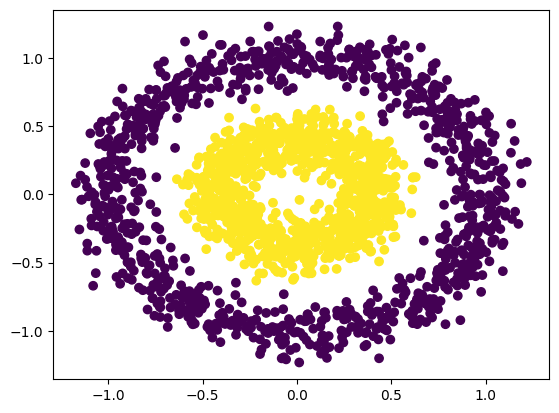

In [105]:
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
y = np.array([-1 if x == 0 else x for x in y])
plt.scatter(X[:,0], X[:,1], c = y)
# plt.plot(X[y==0,0], X[y==0,1], "bo")
# plt.plot(X[y==1,0], X[y==1,1], "yo")

Los comentarios siguientes es el resultado esperado obtenido a través de los modelos de sklearn

In [106]:
# X_new = np.c_[(X,X[:,0]**2,X[:,1]**2)]
# model = LogisticRegression()
# model.fit(X_new,y)

In [107]:
# y_hat = model.predict(X_new)
# plt.scatter(X_new[:,0], X_new[:,1], c = y_hat, cmap=mcolors.ListedColormap(['b', 'y']))
#plt.plot(X_new[y_hat==0,0], X_new[y_hat==0,1], "bo")
#plt.plot(X_new[y_hat==1,0], X_new[y_hat==1,1], "yo")

# Red Neuronal 
Definimos una clase para la creación del modelo de Red Neuronal

In [108]:
class neuralNetwork:
    def __init__(self, num_neuronas, T = 10):
        """Inicializador de modelo 
        y con un cierto número máximo de iteraciones T"""
        self.max_iter = T
        self.num_neuronas = int(num_neuronas)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoidP(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def fit(self, X, y, etha = 0.1):
        """Función ajustadora/de entrenamiento que recibe los datos y las etiquetas
        y utiliza la función kernel que se haya definido para el modelo, asigna
        las variables de alfas (número de errores cometidos por época) así como los 
        correspondientes valores para Y_train y X_train
        - alphas es pesos de entrada a sigmoide
        - alpha 0 es interceptor de entrada a sigmoide (bias 1)
        - thetas son pesos entre sigmoide y lineal (salida)
        - theta 0 es interceptor de salida (bias 2)
        - etha es la learning rate"""
        
        n_neuronas = int(self.num_neuronas)
        n_observaciones, m_caracteristicas = X.shape
        salidas = y.reshape(-1,1).shape[1]
        
        alphas = np.random.randn(m_caracteristicas, n_neuronas)
        alpha0 = np.zeros((1, n_neuronas))
        
        thetas = np.random.randn(n_neuronas, salidas)
        theta0 = np.zeros((salidas, salidas))
        
        #print(f'alphas: {alphas.shape}, alpha0: {alpha0.shape}\nthetas:{thetas.shape}, theta0:{theta0.shape}')
        for t in trange(self.max_iter):
            
            for i in range(n_observaciones):
                xi, yi = X[i].reshape(1,-1), y[i].reshape(-1,1)
                
                capa_entrada = np.dot(xi, alphas) + alpha0
                
                z1 = self.sigmoid(capa_entrada)
                z1_p = self.sigmoidP(capa_entrada) # zj*(1-zj)
                
                capa_oculta = np.dot(z1, thetas) + theta0
                
                # tomando como función de salida una lineal
                salida = capa_oculta 
                #print(salida)
                #Loss = 0.5*((yi - salida)**2)
                error = yi - salida
                
                delta_salida = np.dot(z1.T, error)
                delta_oculta = np.dot(error, thetas.T)*z1_p
                
                # checar si no tiene que ser resta
                thetas += etha * delta_salida
                theta0 += etha * error
                
                alphas += etha * np.dot(xi.T, delta_oculta)
                alpha0 += etha * delta_oculta
        
        
        self.alphas = alphas 
        self.alpha0 = alpha0
        self.thetas = thetas
        self.theta0 = theta0
        self.Y_train = y
        self.X_train = X
        
    def predict(self, X_test):
        """Función de predicción que recibe un conjunto de datos para probar
        y los clasifica en -1 o 1 de acuerdo al ajuste de la red neuronal"""
        n = len(X_test)
        y = np.zeros(n)
        
        for i in range(n):
            xi = X_test[i]
            
            capa_entrada = np.dot(xi, self.alphas) + self.alpha0
                
            z1 = self.sigmoid(capa_entrada)
            z1_p = self.sigmoidP(capa_entrada) # zj*(1-zj)

            capa_oculta = np.dot(z1, self.thetas) + self.theta0
            # tomando como función de salida una lineal  
            y[i] = np.sign(capa_oculta)
        return y
    
    def decision(self, X):
        """Función para trazar la frontera de decisión ante un conjunto de valores de X,
        en esta ocasión no clasificamos como -1 o 1 para poder generar una curva de nivel
        circular y bonita"""
        n = len(X)
        y = np.zeros(n)
        for i in range(n):
            xi = X[i]
            capa_entrada = np.dot(xi, self.alphas) + self.alpha0
                
            z1 = self.sigmoid(capa_entrada)
            z1_p = self.sigmoidP(capa_entrada) # zj*(1-zj)

            capa_oculta = np.dot(z1, self.thetas) + self.theta0
            # tomando como función de salida una lineal  
            y[i] = capa_oculta
        return y

### Red Neuronal

In [118]:
mymodel = neuralNetwork(num_neuronas = 50, T = 15)
mymodel.fit(X,y)

  0%|          | 0/15 [00:00<?, ?it/s]

In [119]:
y_hat_1= mymodel.predict(X)
y_hat_1

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [120]:
y

array([ 1,  1, -1, ...,  1,  1,  1])

In [121]:
def plot_contour_1(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "bo")
    plt.plot(X2_train[:,0], X2_train[:,1], "yo")

    X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
    X_ = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.decision(X_).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0], colors='r', linewidths=2)
    plt.title(f"Decisión con {clf.num_neuronas} neuronas")
    plt.show()

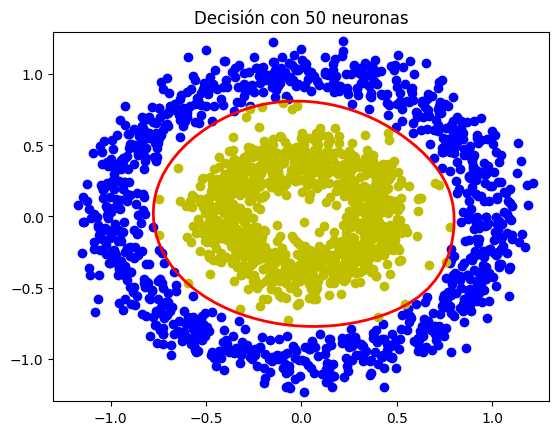

In [122]:
plot_contour_1(X[y_hat_1 == -1], X[y_hat_1 == 1],mymodel)

### Entrenando y probando 80-20

In [123]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

mymodel.fit(X_train, y_train)
y_res = mymodel.predict(X_test)
aciertos = accuracy_score(y_test, y_res)
print("Aciertos:", aciertos*100, "%")

  0%|          | 0/15 [00:00<?, ?it/s]

Aciertos: 99.75 %


### Evolución de frontera por número de neuronas


  0%|          | 0/15 [00:00<?, ?it/s]

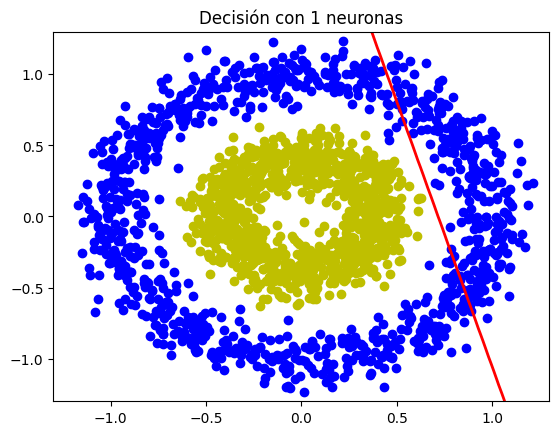

  0%|          | 0/15 [00:00<?, ?it/s]

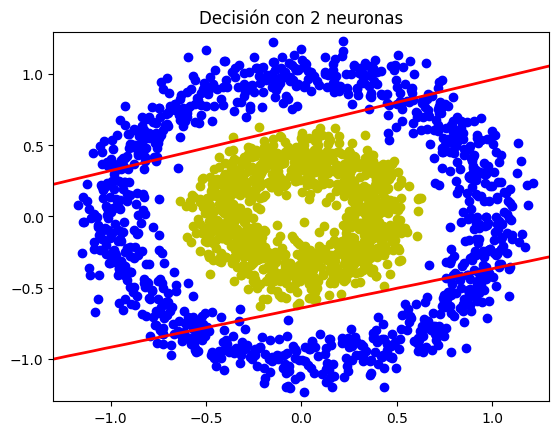

  0%|          | 0/15 [00:00<?, ?it/s]

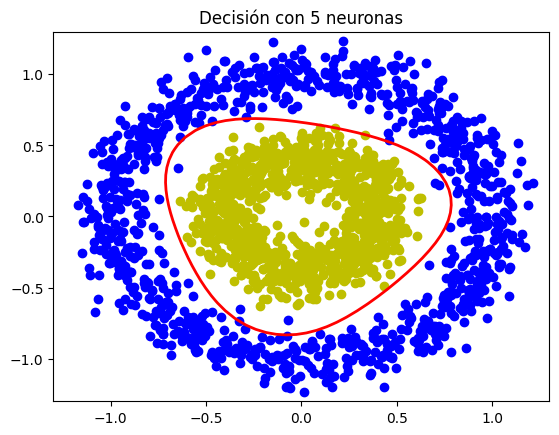

  0%|          | 0/15 [00:00<?, ?it/s]

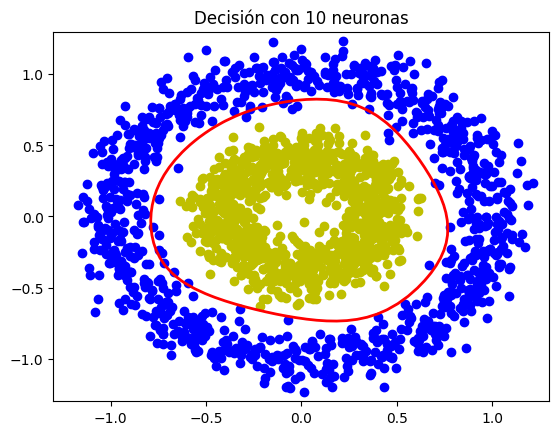

  0%|          | 0/15 [00:00<?, ?it/s]

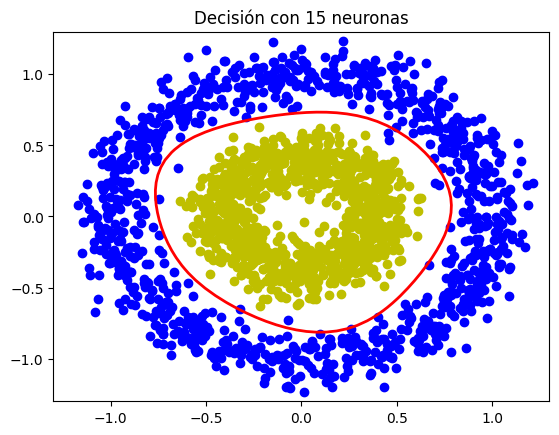

  0%|          | 0/15 [00:00<?, ?it/s]

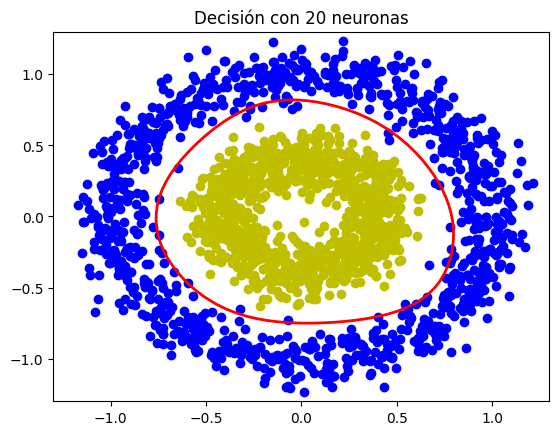

  0%|          | 0/15 [00:00<?, ?it/s]

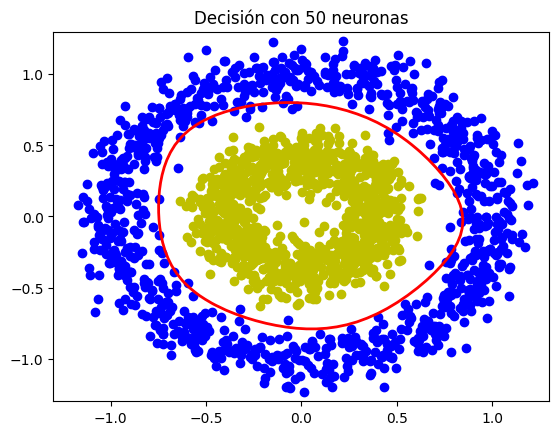

  0%|          | 0/15 [00:00<?, ?it/s]

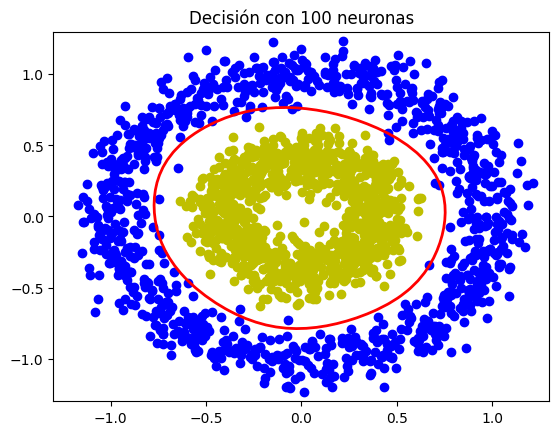

  0%|          | 0/15 [00:00<?, ?it/s]

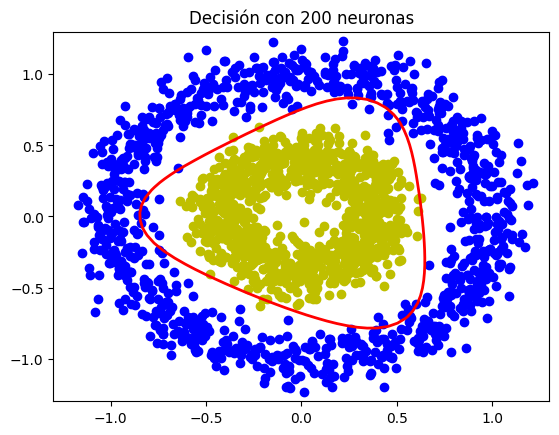

In [125]:
for n in [1, 2, 5, 10, 15, 20, 50, 100, 200]:
    mymodel = neuralNetwork(num_neuronas = n, T = 15)
    mymodel.fit(X,y)
    plot_contour_1(X[y == -1], X[y == 1],mymodel)